In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies_clean = pd.read_csv('tmdb_5000_movies_cleaned.csv')

In [3]:
movies_clean.head()

,budget,genres,homepage,id,keywords,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,2370000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10/12/2009,2787965087,162,Avatar,7.2,11800
1,2450000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26/10/2015,880674609,148,Spectre,6.3,4466
2,2500000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16/07/2012,1084939099,165,The Dark Knight Rises,7.6,9106
3,2600000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07/03/2012,284139100,132,John Carter,6.1,2124
4,2600000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",24/11/2010,591794936,100,Tangled,7.4,3330


In [4]:
movies_clean.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                   int64
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [5]:
movies_clean['revenue'] = movies_clean['revenue'].astype(int)
movies_clean['revenue'].head()

0    2787965087
1     880674609
2    1084939099
3     284139100
4     591794936
Name: revenue, dtype: int64

In [6]:
# Adding a Profit Column to the data

movies_clean['profit'] = movies_clean['revenue'] - movies_clean['budget']

In [7]:
movies_clean.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'profit'],
      dtype='object')

In [8]:
# Adding ROI column 

movies_clean['ROI'] = (movies_clean['profit']/ movies_clean['budget']) * 100

In [9]:
movies_clean['ROI'] = movies_clean['ROI'].round(2)

In [10]:
movies_clean['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [11]:
datas = movies_clean['genres']
datas[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

## Adding average profit by genre to the column 

In [12]:
# adding genre_count column
import json

datas = movies_clean['genres']
data = pd.DataFrame(datas)

# Convert genre strings to list and count items
movies_clean["genre_count"] = data["genres"].apply(lambda x: len(json.loads(x)))

movies_clean['avg_profit_per_genre'] = (movies_clean['profit']/ movies_clean['genre_count'])

In [13]:
movies_clean['avg_profit_per_genre'] = movies_clean['avg_profit_per_genre'].astype(int)

In [14]:
movies_clean['avg_profit_per_genre']

0      696398771
1      292741536
2      270609774
3       93846366
4      294597468
         ...    
816            0
817       160976
818         3229
819      3150860
820         -110
Name: avg_profit_per_genre, Length: 821, dtype: int64

In [15]:
movies_clean['release_date'] = movies_clean['release_date'].str[6:]

In [16]:
movies_clean['release_date'] = movies_clean['release_date'].astype(int)

In [17]:
movies_clean['release_date'] 

0      2009
1      2015
2      2012
3      2012
4      2010
       ... 
816    2011
817    1978
818    2009
819    1994
820    2013
Name: release_date, Length: 821, dtype: int64

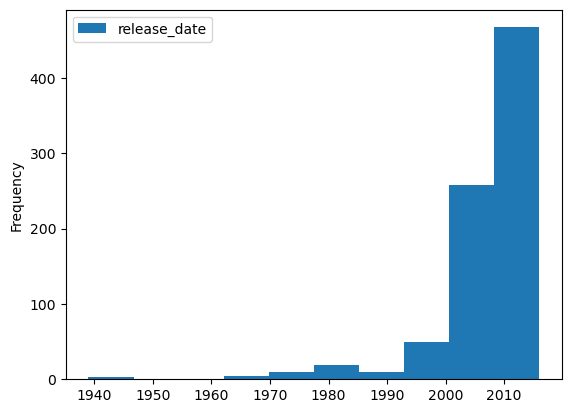

In [18]:
movies_clean.plot(y='release_date', x="profit", kind='hist')
plt.show()

In [29]:
movies_clean.to_csv("MoviesCleanedUpdate.csv", index=False)